   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

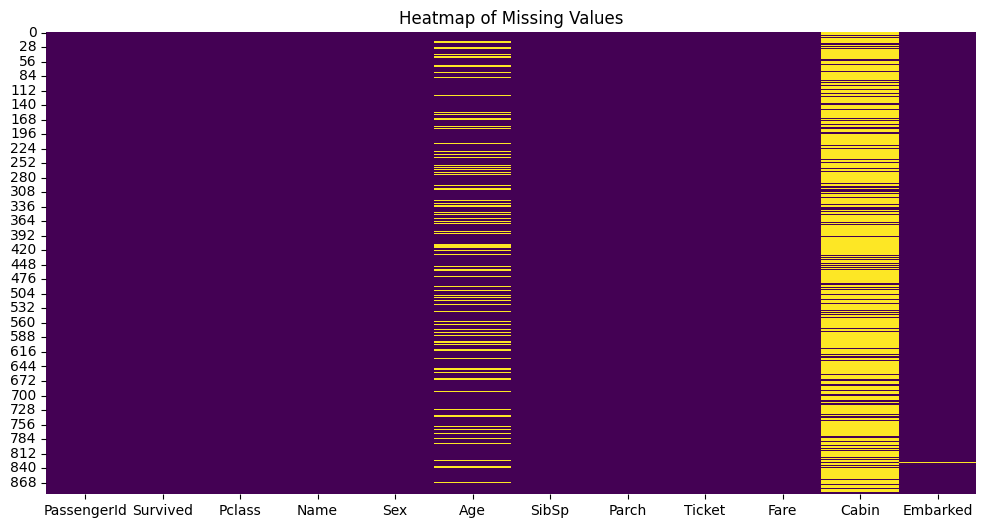

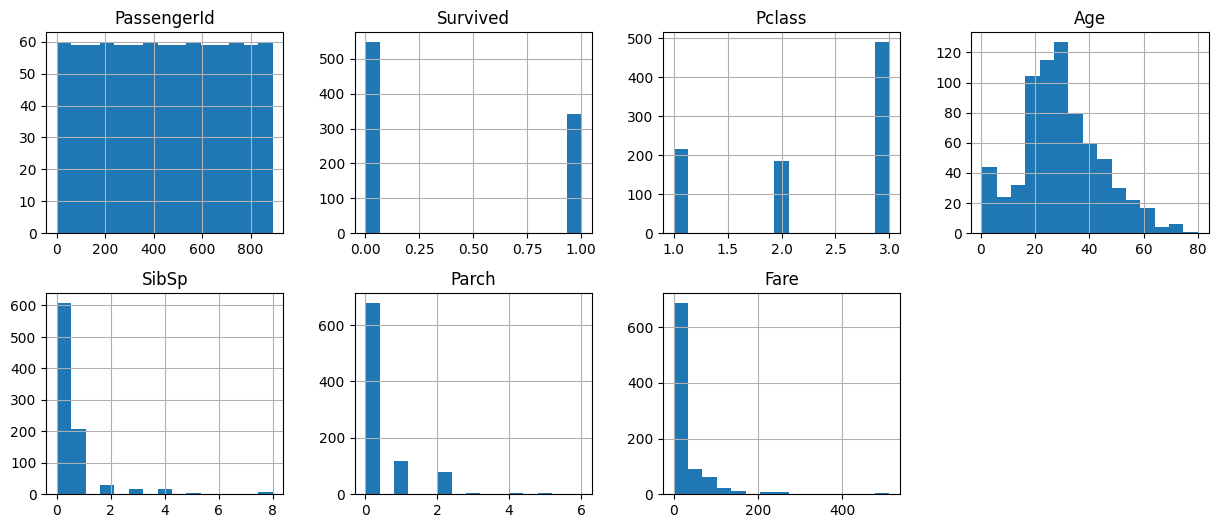

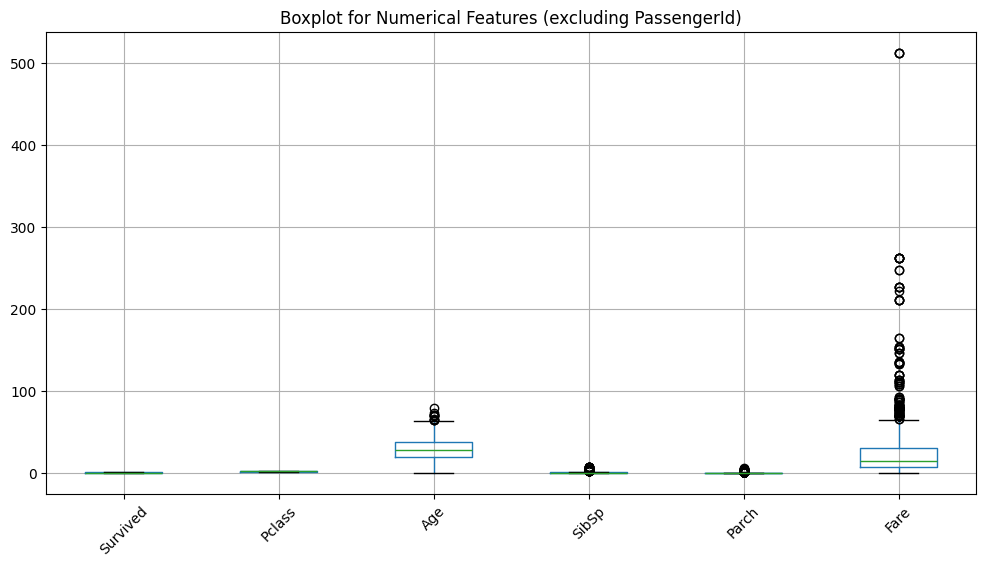

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the datasets
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

# Display the first few rows of the dataset
print(train_data.head())

# 1. Basic Information about the Dataset
print(train_data.info())

# 2. Count Missing Values
missing_values = train_data.isnull().sum()
print(missing_values)

# 3. Percentage of Missing Values
total_entries = len(train_data)
missing_percentage = (train_data.isnull().sum() / total_entries) * 100
print(missing_percentage)

# 4. Visualize Missing Data with Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(train_data.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()

# 5. Value Distribution for Numerical Features
numerical_cols = train_data.select_dtypes(include=['float64', 'int64']).columns
train_data[numerical_cols].hist(bins=15, figsize=(15, 6), layout=(2, 4))
plt.show()

# 6. Boxplot for Numerical Features (To identify outliers)
numerical_cols_without_id = numerical_cols[1:]

plt.figure(figsize=(12, 6))
train_data[numerical_cols_without_id].boxplot()
plt.xticks(rotation=45)
plt.title('Boxplot for Numerical Features (excluding PassengerId)')
plt.show()

In [115]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Reload the original dataset to avoid any previous preprocessing steps
train_data_original = pd.read_csv('train.csv')

# Preprocess the data
# Handle missing values directly
train_data_original['Age'] = train_data_original['Age'].fillna(train_data_original['Age'].median())
train_data_original['Embarked'] = train_data_original['Embarked'].fillna(train_data_original['Embarked'].mode()[0])

# Convert 'Sex' and 'Embarked' into numeric format using one-hot encoding
train_data_original = pd.get_dummies(train_data_original, columns=['Sex', 'Embarked'])

# Define original features
original_features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']

# Prepare the data
X_original = train_data_original[original_features]
y_original = train_data_original['Survived']

# Split the data into training and testing sets
X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(X_original, y_original, test_size=0.2, random_state=42)

# Initialize the model
model_original = RandomForestClassifier(random_state=42)

# Train the model on the original features
model_original.fit(X_train_original, y_train_original)

# Make predictions on the test set
y_pred_original = model_original.predict(X_test_original)

# Evaluate the model
accuracy_original = accuracy_score(y_test_original, y_pred_original)
print(f'Baseline Accuracy with Original Features: {accuracy_original}')

Baseline Accuracy with Original Features: 0.8044692737430168


In [101]:
train_data['AgeMissing'] = train_data['Age'].isnull()

# Compare survival rates
survival_rates = train_data.groupby('AgeMissing')['Survived'].mean()
print(survival_rates)

AgeMissing
False    0.406162
True     0.293785
Name: Survived, dtype: float64


In [102]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder

# One hot encoding for categorical columns
train_data = pd.get_dummies(train_data, columns=['Sex', 'Embarked'])

# Handle 'Cabin' by creating a binary feature indicating cabin data availability
train_data['CabinAvailable'] = train_data['Cabin'].notnull().astype(int)

# Select Features
features = ['Pclass', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'CabinAvailable']
X = train_data[features]
y = train_data['Age']

# Split the Data
X_train = X[train_data['Age'].notnull()]
y_train = y[train_data['Age'].notnull()]
X_missing_age = X[train_data['Age'].isnull()]

# Train the Model
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)

# Predict and Fill in Missing Ages
predicted_ages = regressor.predict(X_missing_age)
train_data.loc[train_data['Age'].isnull(), 'Age'] = predicted_ages



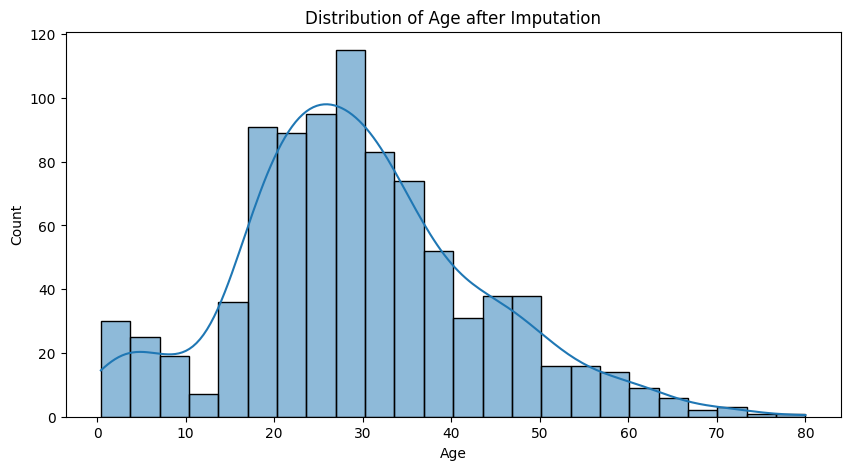

In [103]:
# For Age
plt.figure(figsize=(10, 5))
sns.histplot(train_data['Age'], kde=True)
plt.title('Distribution of Age after Imputation')
plt.show()


In [104]:
train_data['Deck'] = train_data['Cabin'].str[0]
train_data['Deck'] = train_data['Deck'].fillna('Missing')

In [105]:
# Select only numeric columns for correlation analysis
numeric_data = train_data.select_dtypes(include=[np.number])

# Analyze the correlation of CabinAvailable with other numeric features
correlations = numeric_data.corr()['CabinAvailable'].sort_values()

# Print the correlations
print(correlations)

Pclass           -0.725541
SibSp            -0.040460
PassengerId       0.019919
Parch             0.036987
Age               0.263899
Survived          0.316912
Fare              0.482075
CabinAvailable    1.000000
Name: CabinAvailable, dtype: float64


In [106]:
# Create 'FamilySize' feature
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1

# Display the first few rows to confirm the new column
print(train_data[['SibSp', 'Parch', 'FamilySize']].head())

   SibSp  Parch  FamilySize
0      1      0           2
1      1      0           2
2      0      0           1
3      1      0           2
4      0      0           1


In [107]:
# Get column names
column_names = train_data.columns

# Print column names
print(column_names)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'AgeMissing', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'CabinAvailable', 'Deck',
       'FamilySize'],
      dtype='object')


In [108]:
features = [
    'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'AgeMissing',
    'Sex_female', 'Sex_male', 'Embarked_S',
    'FamilySize'
]


In [109]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Prepare the data
X = train_data[features]
y = train_data['Survived']

# Handle dataset bias here if needed (e.g., using stratified split or class weights)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Initialize the model
model = RandomForestClassifier(random_state=42, class_weight='balanced')

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8212290502793296


In [110]:
importances = model.feature_importances_
feature_importance = sorted(zip(features, importances), key=lambda x: x[1], reverse=True)
for feature, importance in feature_importance:
    print(f'{feature}: {importance}')

Age: 0.25274777433631224
Fare: 0.23616497168355025
Sex_female: 0.14924457298397628
Sex_male: 0.1337527900110272
Pclass: 0.08023040525142885
FamilySize: 0.05395161338865298
SibSp: 0.028185177935640262
Embarked_S: 0.024161611101362713
Parch: 0.02343062573817575
AgeMissing: 0.018130457569873554


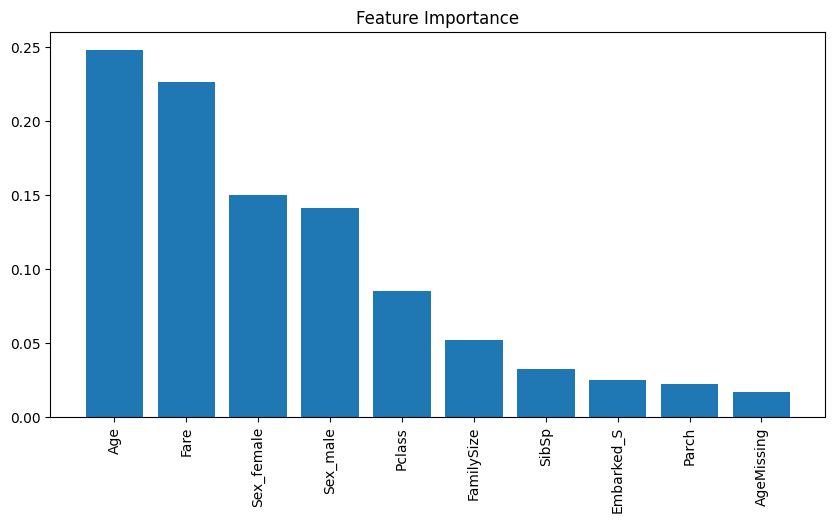

In [111]:
from sklearn.ensemble import RandomForestClassifier

# Assuming X_train, y_train are your training data and labels
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X_train.columns[i] for i in indices]

# Create plot
plt.figure(figsize=(10, 5))

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X_train.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X_train.shape[1]), names, rotation=90)

# Show plot
plt.show()

In [112]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# Add more models as needed

# Prepare the data
X = train_data[features]
y = train_data['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List of models
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('KNN', KNeighborsClassifier()),
    ('SVM', SVC()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    # Add more models as needed
]

# Evaluate each model
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} Accuracy: {accuracy}')
    # Optionally, use cross-validation to evaluate model
    # cv_scores = cross_val_score(model, X, y, cv=5)
    # print(f'{name} Cross-validated Accuracy: {cv_scores.mean()}')

Logistic Regression Accuracy: 0.8156424581005587
KNN Accuracy: 0.7039106145251397
SVM Accuracy: 0.664804469273743
Decision Tree Accuracy: 0.8156424581005587
Random Forest Accuracy: 0.8156424581005587
Gradient Boosting Accuracy: 0.8268156424581006


In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Define a pipeline that includes scaling and logistic regression
pipeline = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

# Define the parameter grid
param_grid_lr = {
    'logisticregression__C': [0.1, 1, 10],
    'logisticregression__solver': ['lbfgs', 'liblinear']  # 'liblinear' works well for small datasets
}

# Grid search with cross-validation
grid_search_lr = GridSearchCV(pipeline, param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr.fit(X_train, y_train)

# Best parameters and best score
print('Best Parameters for Logistic Regression:', grid_search_lr.best_params_)
print('Best Score for Logistic Regression:', grid_search_lr.best_score_)

Best Parameters for Logistic Regression: {'logisticregression__C': 0.1, 'logisticregression__solver': 'lbfgs'}
Best Score for Logistic Regression: 0.8005121638924455


In [114]:
from sklearn.tree import DecisionTreeClassifier

# Define the model
model_dt = DecisionTreeClassifier(random_state=42)

# Define the parameters grid
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid search with cross-validation
grid_search_dt = GridSearchCV(model_dt, param_grid_dt, cv=5, scoring='accuracy')
grid_search_dt.fit(X_train, y_train)

# Best parameters and best score
print('Best Parameters for Decision Tree:', grid_search_dt.best_params_)
print('Best Score for Decision Tree:', grid_search_dt.best_score_)

Best Parameters for Decision Tree: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Score for Decision Tree: 0.7935881020388063
